# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Intro to unsupervised learning with K-Means clustering

Revised by Jeff Hale

### Learning Objectives
*After this lesson, you will be able to:*
- Explain the difference between supervised and unsupervised learning
- Understand when to use clustering
- Format and preprocess data for clustering
- Perform a K-Means clustering analysis
- Evaluate K-Means clusters on Silhouette Score and Intertia


### Prior Knowledge Required
- Python and pandas basics

## Unsupervised learning 

Includes clustering, dimensionality reduction (e.g. PCA), and recommender systems.


#### What's the difference between supervised and unsupervised learning with discrete groups?

In [ ]:
# What is in what class. We create the label 

## Clustering ⭐️
Group “similar” data points together.


### How could clustering be useful?

   - As an end in itself. For exampl,e segment customers based on characteristics.
   - As a pre-processing step in a supervised learning problem. Create labels that will be a feature in a supervised learning algorithm. 

Let's use an algorithm to group data points.

----
# K-means

There are many clustering algorithms. K Means is probably the most popular.

First, pick a value for _k_ (the number of clusters to create)   (__Q__: How is this different than the _K_ in KNN?) You do this.

### Then, the K-means algorithm:

Initialize k random _centroids_ (starting points) in your data

In a loop:

1. Assign each point to the nearest centroid. 
1. Move each centroid to the center of its cluster. A centroid is the the midpoint for the cluster (not an actual datapoint).

Repeat the loop until your centroids converge (stop changing).

[Click here](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) for a very cool 👍 demo of k-means clustering in action.

---
## Doing it
Let's do some k-means clustering with the iris dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import KMeans

from sklearn.cluster import KMeans

#### Check out the dataset and our target values

In [4]:
df = pd.read_csv('./data/iris.csv')
df.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


#### What about _y_ and the test set??

In [7]:
X = df.iloc[:, :-1]
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


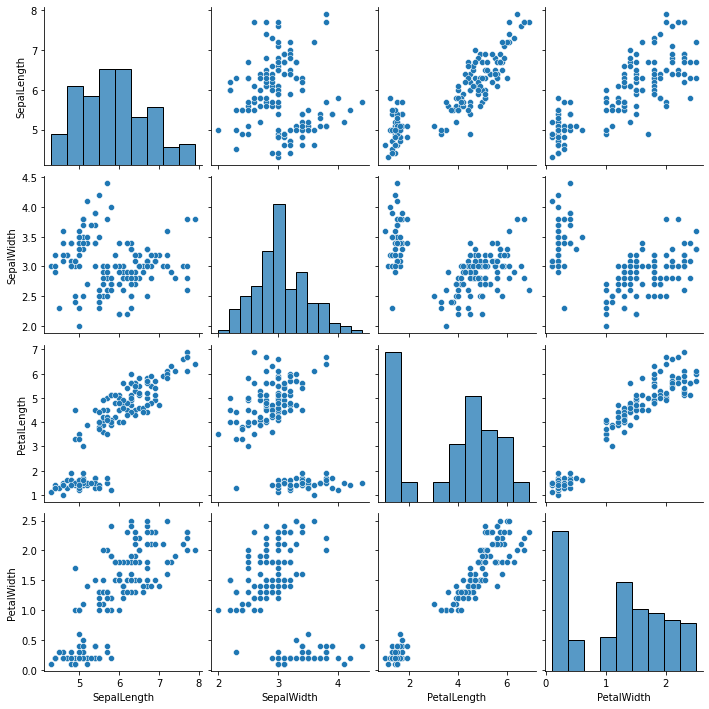

In [8]:
sns.pairplot(X)

#### Let's scale the data. Why should we do that?

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sscaler = StandardScaler()

In [11]:
# Do not have train and test set 

X_scaled = sscaler.fit_transform(X)

Now that we've formatted our data and understand its structures, we can cluster.

We're going to set k = 2, given the pattern we were seeing above in our graphs.

In [12]:
kmeans = KMeans(n_clusters = 2).fit(X_scaled)

In [13]:
# What clusters each of the points are in 

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### Let's look at the resulting labels

In [14]:
X['label'] = kmeans.labels_

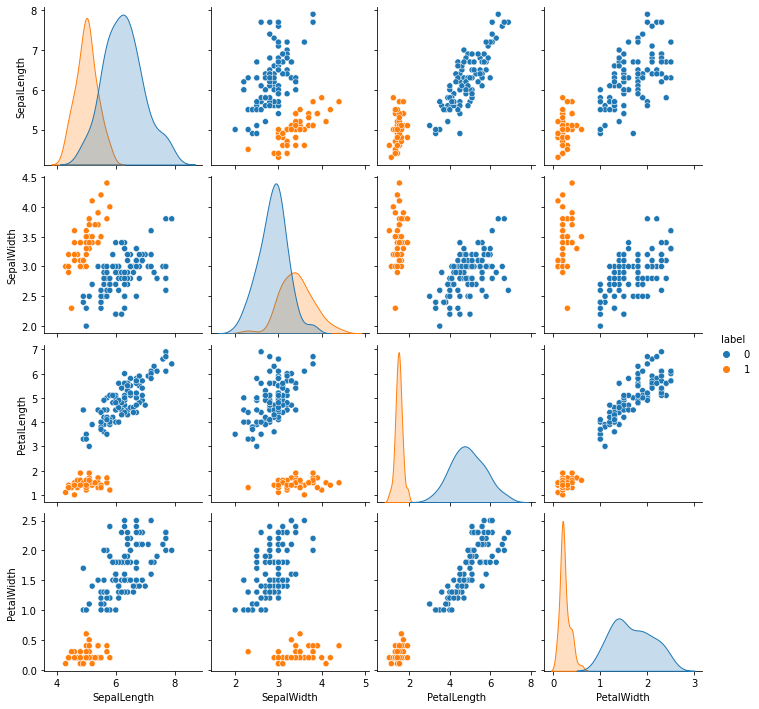

In [15]:
# Looks like it did a good job separating the two groups that we see 

sns.pairplot(X, hue = 'label')


---
## Metrics for assessing clusters

### Inertia

Sum of squared differences between each point in a cluster and that cluster's centroid.

How dense is each cluster? 


- low inertia = dense cluster
- ranges from 0 to very high values


$$ \sum_{j=0}^{n} (x_j - \mu_i)^2 $$

where $\mu_i$ is a cluster centroid



`.inertia_` is an attribute of a fitted sklearn's kmeans object

#### Lower inertia is better!

#### What's one way to always improve your intertia score?


In [16]:
# Add another cluster! 

#### Get the inertia

In [18]:
kmeans.inertia_

223.73200573676343

---
### Silhouette Score

Tells you how much closer data points are to their own clusters than to the nearest neighbor cluster.

How far apart are the clusters?
- ranges from -1 to 1
- high silhouette score means the clusters are well separated



### $s_i = \frac{b_i - a_i}{max\{a_i, b_i\}}$

Where:
- $a_i$ = Cohesion: Mean distance of points within a cluster from each other.
- $b_i$ = Separation: Mean distance from point $x_i$ to all points in the next nearest cluster.

Use scikit-learn: `metrics.silhouette_score(X_scaled, labels)`.

#### Higher silhouette score is better!


#### Compute the silhouette score 

In [19]:
from sklearn.metrics import silhouette_score

In [21]:
silhouette_score(X_scaled, kmeans.labels_)

0.580184463257396

##### Let's put the *labels* column into our DataFrame

In [22]:
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


---
## How do I know which number to pick for k? 🤔

Finding the best k to use for k-means clustering is not a simple task.
  

NO ground truth, so there isn't necessarily a "correct" number of clusters. 

The business application is often an important consideration:
   - e.g. I need to create 3 profiles for marketing to target
   - Even if the most natural-looking clusters are small, we may try to group several of them together so that it makes financial sense to target those groups.

**Other common approaches:**
- Previous experience.
- Using the elbow method to find a number of clusters that no longer seems to improve a clustering metric by a noticeable degree.
- Scatter plots show separable clusters
- The silhouette coefficient 
- Inertia
- If we're using clustering to improve performance on a supervised learning problem, then we can use our usual methods to test predictions and tune k.
 

#### Plot each cluster in a different color with seaborn's 'hue' parameter.

### For comparison, here's the data colored by species


---
### Use the elbow method to choose _k_

The [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) is one possible method to help narrow in on the ideal value of **K**. 

### Choose the number of clusters where the next cluster doesn't significantly improve performance. 

#### Let's use the .interia() method as our evaluation metric

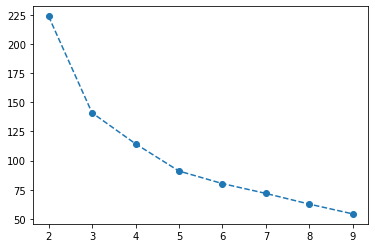

In [32]:
inertias = []
for k in range(2, 10):
    #instantiate kmeans
    kmeans = KMeans(n_clusters = k, random_state=42).fit(X_scaled)
    inertias.append(kmeans.inertia_)
plt.plot(range(2, 10), inertias, '--o')

#### Analyze the above

- Do you see the **"elbow"**?

- What's the best value for _k_?



In [ ]:
# Elbow seems to be at 3 - right number of clusters

#### Now let's make an elbow plot with the silhouette score

# Remember: Higher is Better for Silhouette Score!

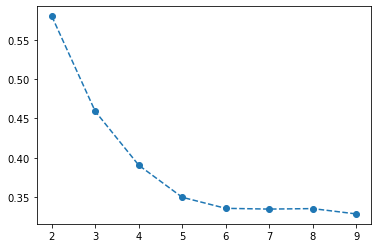

In [30]:
silhouettes = []
for k in range (2, 10):
    #instantiate kmeans 
    kmeans = KMeans(n_clusters=k).fit(X_scaled)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))
plt.plot(range(2,10), silhouettes, '--o')

#### What _k_ should we choose?

---
# Exercise 🏋️‍♂️🏋️‍♀️

## Use k-means to find clusters in the foods nutrients dataset:

In [33]:
# http://people.sc.fsu.edu/~jburkardt/datasets/hartigan/file06.txt

foods  = pd.read_csv('./data/nutrients.txt', sep=r'\s+')

#### Inspect the data, scale data, instantiate model, and fit the model

In [34]:
foods.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [35]:
foods.drop('Name', axis=1, inplace=True)

In [36]:
foods.head()

,Energy,Protein,Fat,Calcium,Iron
0,340,20,28,9,2.6
1,245,21,17,9,2.7
2,420,15,39,7,2.0
3,375,19,32,9,2.6
4,180,22,10,17,3.7


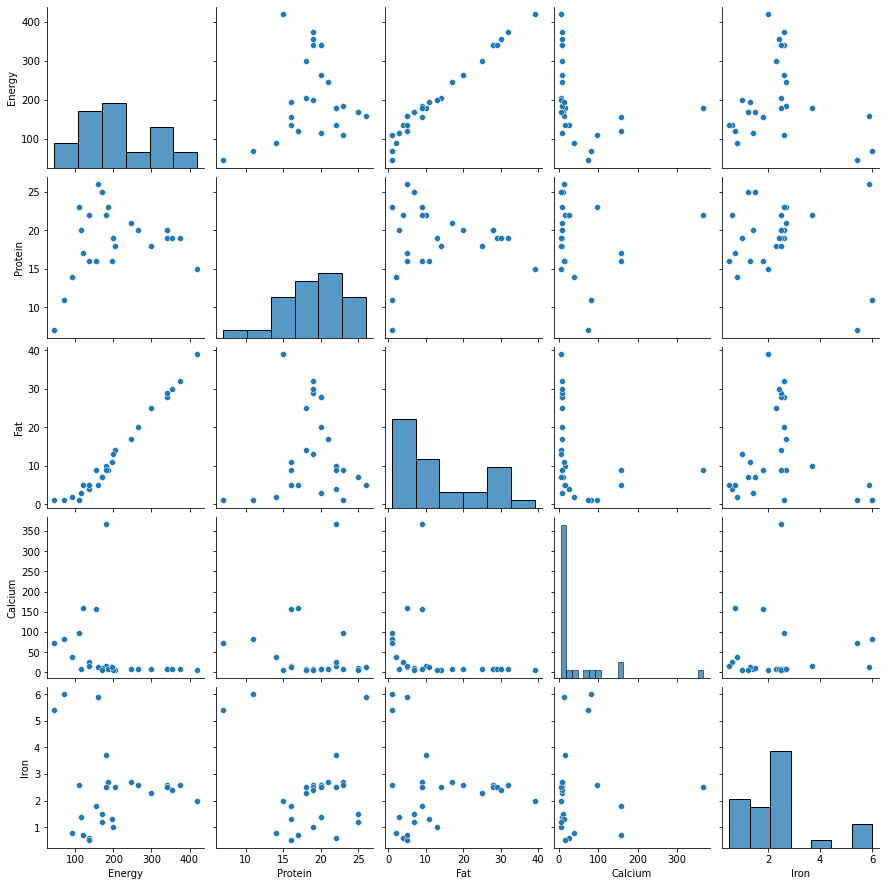

In [37]:
sns.pairplot(foods) #does not look like clustering is as good as the iris dataset 

In [46]:
sscaler = StandardScaler()
foods_scaled = sscaler.fit_transform(foods)


#### Look at the labels, centroids, and inertia.

In [40]:
kmeans = KMeans(n_clusters = 4).fit(foods_scaled)
kmeans.labels_

array([1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 3, 2, 2], dtype=int32)

#### Add a label column to the foods column.

In [47]:
foods['labels'] = kmeans.labels_
foods.head()

,Energy,Protein,Fat,Calcium,Iron,labels
0,340,20,28,9,2.6,1
1,245,21,17,9,2.7,1
2,420,15,39,7,2.0,1
3,375,19,32,9,2.6,1
4,180,22,10,17,3.7,2


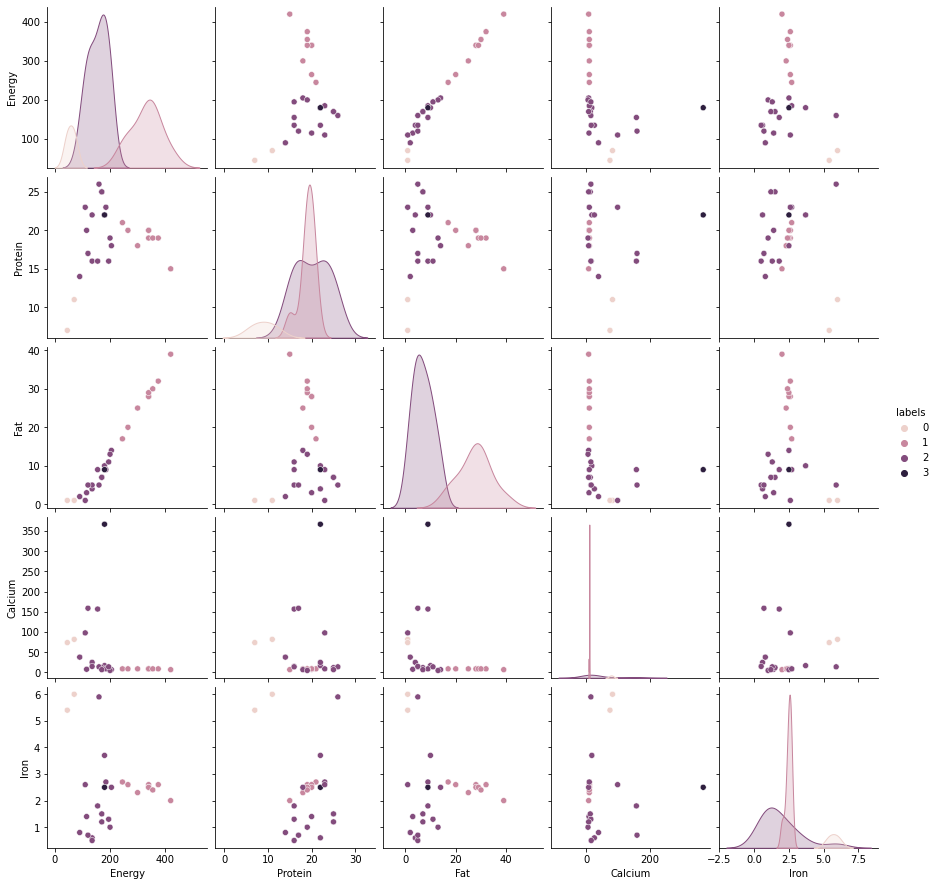

In [50]:
# Looks like it did a good job separating the two groups that we see 

sns.pairplot(foods, hue = 'labels')

#### Try to plot the columns - might hang.

#### Use the elbow method with inertia to determine a good value for K

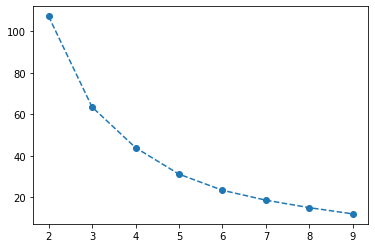

In [55]:
inertias = []
for k in range(2, 10):
    #instantiate kmeans
    kmeans = KMeans(n_clusters = k).fit(foods_scaled)
    inertias.append(kmeans.inertia_)
plt.plot(range(2, 10), inertias, '--o')

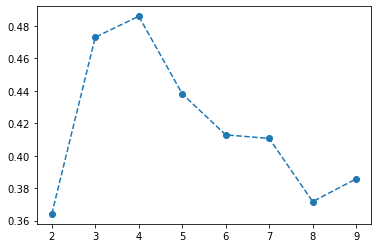

In [54]:
silhouettes = []
for k in range(2, 10):
    #instantiate kmeans 
    kmeans = KMeans(n_clusters=k).fit(foods_scaled)
    silhouettes.append(silhouette_score(foods_scaled, kmeans.labels_))
plt.plot(range(2,10), silhouettes, '--o')

In [56]:
# 4 seems to be a winning candidate here - go with k = 4 

---
<a id="lesson-summary"></a>
## Lesson Summary

Remember that different starting points may give you different clusters. ⚠️ You won't necessarily get an optimal set of clusters!    

You've learned about when and how to use the unsupervised learning clustering algorithm _k-means_. You saw how to save your cluster labels in a DataFrame. You learned several way to evaluate the best number of clusters. 

### Check for understanding

- What's the main difference between supervised learning and unsupervised learning
- Why use clustering?
- What does k-means clustering do?
- What does silhouette score measure?

## Further reading

- The [scikit-learn documentation](http://scikit-learn.org/stable/modules/clustering.html) has a great summary of many other clustering algorithms.
- This [PyData talk](https://www.youtube.com/watch?v=Mf6MqIS2ql4) is good overview of clustering, different algorithms, and how to think about the quality of your clusters.